In [388]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [389]:
X=pd.read_csv("Train_Data.csv")

In [390]:
X.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [197]:
X.shape

(1100, 81)

In [391]:
X.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.033947,-0.048795,-0.042082,-0.027832,0.000590,0.007835,-0.010308,-0.059117,-0.013843,...,-0.014338,-0.015010,-0.016706,-0.069526,-0.001836,-0.001344,-0.014363,-0.001305,0.009672,-0.028616
MSSubClass,0.033947,1.000000,-0.412206,-0.128684,0.038741,-0.051408,0.029675,0.044350,0.008275,-0.066280,...,-0.012907,0.003868,-0.011218,-0.044191,-0.030618,-0.012873,-0.020578,0.024947,-0.035499,-0.085299
LotFrontage,-0.048795,-0.412206,1.000000,0.388608,0.244318,-0.062296,0.115459,0.076640,0.190144,0.128042,...,0.079259,0.139645,0.042866,0.079715,0.055744,0.102568,0.007066,0.014894,0.032265,0.364208
LotArea,-0.042082,-0.128684,0.388608,1.000000,0.097716,0.002818,0.001278,0.008503,0.079456,0.188077,...,0.173109,0.064519,-0.012521,0.013408,0.043564,0.024392,0.032443,0.011493,-0.011689,0.264500
OverallQual,-0.027832,0.038741,0.244318,0.097716,1.000000,-0.082726,0.569303,0.560020,0.405790,0.221694,...,0.237003,0.318041,-0.100017,0.016054,0.086053,0.023546,-0.034143,0.094088,-0.032829,0.796618
OverallCond,0.000590,-0.051408,-0.062296,0.002818,-0.082726,1.000000,-0.386310,0.081385,-0.125976,-0.039508,...,0.016022,-0.019416,0.059156,0.015166,0.054973,-0.017158,0.083169,-0.012803,0.027916,-0.081109
YearBuilt,0.007835,0.029675,0.115459,0.001278,0.569303,-0.386310,1.000000,0.576360,0.316355,0.243215,...,0.224473,0.180949,-0.376064,0.027591,-0.032926,-0.031799,-0.041598,0.027511,0.013259,0.528573
YearRemodAdd,-0.010308,0.044350,0.076640,0.008503,0.560020,0.081385,0.576360,1.000000,0.176842,0.124385,...,0.213336,0.245829,-0.189984,0.024941,-0.018538,0.020386,-0.005201,0.040368,0.043795,0.521432
MasVnrArea,-0.059117,0.008275,0.190144,0.079456,0.405790,-0.125976,0.316355,0.176842,1.000000,0.247278,...,0.162576,0.106044,-0.093785,0.011692,0.079811,-0.011822,-0.026764,-0.006096,-0.001217,0.481024
BsmtFinSF1,-0.013843,-0.066280,0.128042,0.188077,0.221694,-0.039508,0.243215,0.124385,0.247278,1.000000,...,0.221374,0.071675,-0.093631,0.003761,0.063124,0.037328,0.001235,-0.016773,0.018716,0.391743


In [198]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 81 columns):
Id               1100 non-null int64
MSSubClass       1100 non-null int64
MSZoning         1100 non-null object
LotFrontage      908 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
Alley            69 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-nu

In [394]:
col_to_drop=["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"]

In [395]:
for col in X.corr().columns:
    if X.corr()[col]["SalePrice"]<0.05 and X.corr()[col]["SalePrice"]>-0.05:
        col_to_drop.append(col)

In [396]:
col_to_drop

['Alley',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'FireplaceQu',
 'Id',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:
X.corr().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [397]:
X=X.drop(col_to_drop,axis=1)

In [398]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 67 columns):
MSSubClass       1100 non-null int64
MSZoning         1100 non-null object
LotFrontage      908 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-null object
Exterior2nd      1100 non-null object
MasVnrType       1094 non

In [399]:
X.shape

(1100, 67)

In [400]:
Y=X["SalePrice"]

In [401]:
X=X.drop(columns=["SalePrice"])

In [402]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 66 columns):
MSSubClass       1100 non-null int64
MSZoning         1100 non-null object
LotFrontage      908 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-null object
Exterior2nd      1100 non-null object
MasVnrType       1094 non

In [403]:
X.shape

(1100, 66)

In [404]:
Y.shape

(1100,)

In [405]:
from keras.layers import *

In [465]:
model=Sequential()
# model.add(Dense(4096,activation='linear',input_dim=74))
# model.add(Dense(1024,activation='linear'))
model.add(Dense(128,activation='relu',input_shape=(187,)))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               24064     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 33,377
Trainable params: 33,377
Non-trainable params: 0
_________________________________________________________________


In [361]:
from sklearn.preprocessing import LabelEncoder

In [362]:
le=LabelEncoder()

In [307]:
X

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,TA,TA,Y,0,61,0,0,WD,Normal
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,TA,TA,Y,298,0,0,0,WD,Normal
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,TA,TA,Y,0,42,0,0,WD,Normal
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,TA,TA,Y,0,35,272,0,WD,Abnorml
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,TA,TA,Y,192,84,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,RL,78.0,9317,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,440,TA,TA,Y,0,22,0,0,WD,Normal
1096,RM,60.0,6882,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,NaN,NaN,Y,136,0,115,0,WD,Normal
1097,RL,NaN,3696,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,...,461,TA,TA,Y,0,74,137,0,WD,Normal
1098,RM,50.0,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,...,240,TA,TA,Y,0,0,0,0,WD,Normal


In [308]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1095    176432
1096    127000
1097    170000
1098    128000
1099    157000
Name: SalePrice, Length: 1100, dtype: int64

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 64 columns):
MSZoning         1100 non-null object
LotFrontage      908 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-null object
Exterior2nd      1100 non-null object
MasVnrType       1094 non-null object
MasVnrArea       1094 non-null float64
ExterQual        1100 

In [212]:
X.shape

(1100, 64)

In [406]:
X["LotFrontage"]=X["LotFrontage"].fillna(X["LotFrontage"].mean())

In [407]:
X["MasVnrArea"]=X["MasVnrArea"].fillna(X["MasVnrArea"].mean())

In [408]:
X["GarageYrBlt"]=X["GarageYrBlt"].fillna(X["GarageYrBlt"].mean())

In [36]:
# X=X.drop(columns=["YearBuilt","YrSold"])

In [216]:
X

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition
0,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,TA,TA,Y,0,61,0,0,WD,Normal
1,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,TA,TA,Y,298,0,0,0,WD,Normal
2,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,TA,TA,Y,0,42,0,0,WD,Normal
3,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,TA,TA,Y,0,35,272,0,WD,Abnorml
4,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,TA,TA,Y,192,84,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,RL,78.000000,9317,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,440,TA,TA,Y,0,22,0,0,WD,Normal
1096,RM,60.000000,6882,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,NaN,NaN,Y,136,0,115,0,WD,Normal
1097,RL,69.618943,3696,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,...,461,TA,TA,Y,0,74,137,0,WD,Normal
1098,RM,50.000000,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,...,240,TA,TA,Y,0,0,0,0,WD,Normal


In [217]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 64 columns):
MSZoning         1100 non-null object
LotFrontage      1100 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-null object
Exterior2nd      1100 non-null object
MasVnrType       1094 non-null object
MasVnrArea       1100 non-null float64
ExterQual        1100

In [796]:
X["BsmtQual"].value_counts().keys()[0]

'Gd'

In [409]:
X["BsmtQual"].fillna(X["BsmtQual"].value_counts().keys()[0],inplace=True)

In [410]:
X["MasVnrType"].fillna(X["MasVnrType"].value_counts().keys()[0],inplace=True)

In [411]:
X["BsmtCond"].fillna(X["BsmtCond"].value_counts().keys()[0],inplace=True)

In [412]:
X["BsmtExposure"].fillna(X["BsmtExposure"].value_counts().keys()[0],inplace=True)

In [413]:
X["BsmtFinType1"].fillna(X["BsmtFinType1"].value_counts().keys()[0],inplace=True)

In [414]:
X["BsmtFinType2"].fillna(X["BsmtFinType2"].value_counts().keys()[0],inplace=True)

In [415]:
X["GarageType"].fillna(X["GarageType"].value_counts().keys()[0],inplace=True)

In [416]:
X["GarageFinish"].fillna(X["GarageFinish"].value_counts().keys()[0],inplace=True)

In [417]:
X["GarageQual"].fillna(X["GarageQual"].value_counts().keys()[0],inplace=True)

In [418]:
X["GarageCond"].fillna(X["GarageCond"].value_counts().keys()[0],inplace=True)

In [419]:
X.shape

(1100, 66)

In [420]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 66 columns):
MSSubClass       1100 non-null int64
MSZoning         1100 non-null object
LotFrontage      1100 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-null object
Exterior2nd      1100 non-null object
MasVnrType       1100 no

In [421]:
XT=pd.get_dummies(X,drop_first=True)

In [422]:
XT.shape

(1100, 215)

In [423]:
XT

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,78.000000,9317,6,5,2006,2006,0.0,24,1290,...,0,0,0,0,1,0,0,0,1,0
1096,70,60.000000,6882,6,7,1914,2006,0.0,0,684,...,0,0,0,0,1,0,0,0,1,0
1097,120,69.618943,3696,8,5,1986,1986,0.0,0,1074,...,0,0,0,0,1,0,0,0,1,0
1098,50,50.000000,6000,4,6,1936,1950,0.0,672,0,...,0,0,0,0,1,0,0,0,1,0


In [424]:
from sklearn import preprocessing

In [425]:
min_max_scalar=preprocessing.MinMaxScaler()

In [461]:
XT=min_max_scalar.fit_transform(XT)

In [462]:
from keras.utils import to_categorical

In [466]:
XT

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.58823529, 0.16650323, 0.01119914, ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.09931507, 0.02196826, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20890411, 0.04945196, ..., 0.        , 0.        ,
        0.        ]])

In [467]:
hist=model.fit(XT,Y,epochs=200,validation_split=0.1)

Train on 990 samples, validate on 110 samples
Epoch 1/200
990/990 [==============================] - 0s 249us/step - loss: 182147.1873 - mae: 182147.2031 - val_loss: 173152.4577 - val_mae: 173152.4531
Epoch 2/200
990/990 [==============================] - 0s 55us/step - loss: 182085.7465 - mae: 182085.7500 - val_loss: 173000.9338 - val_mae: 173000.9531
Epoch 3/200
990/990 [==============================] - 0s 63us/step - loss: 181720.6129 - mae: 181720.6250 - val_loss: 172299.6520 - val_mae: 172299.6562
Epoch 4/200
990/990 [==============================] - 0s 60us/step - loss: 180449.8647 - mae: 180449.8750 - val_loss: 170229.3724 - val_mae: 170229.3750
Epoch 5/200
990/990 [==============================] - 0s 55us/step - loss: 177228.2840 - mae: 177228.2812 - val_loss: 165493.3321 - val_mae: 165493.3281
Epoch 6/200
990/990 [==============================] - 0s 86us/step - loss: 170547.5388 - mae: 170547.5000 - val_loss: 156357.3358 - val_mae: 156357.3281
Epoch 7/200
990/990 [========

990/990 [==============================] - 0s 89us/step - loss: 24353.2270 - mae: 24353.2285 - val_loss: 22133.5887 - val_mae: 22133.5879
Epoch 55/200
990/990 [==============================] - 0s 95us/step - loss: 24085.8422 - mae: 24085.8438 - val_loss: 21765.2926 - val_mae: 21765.2930
Epoch 56/200
990/990 [==============================] - 0s 64us/step - loss: 23879.8397 - mae: 23879.8398 - val_loss: 21372.5617 - val_mae: 21372.5605
Epoch 57/200
990/990 [==============================] - 0s 71us/step - loss: 23584.9354 - mae: 23584.9355 - val_loss: 21326.9053 - val_mae: 21326.9043
Epoch 58/200
990/990 [==============================] - 0s 83us/step - loss: 23369.4499 - mae: 23369.4492 - val_loss: 21002.3797 - val_mae: 21002.3789
Epoch 59/200
990/990 [==============================] - 0s 87us/step - loss: 23156.9140 - mae: 23156.9160 - val_loss: 20931.6381 - val_mae: 20931.6387
Epoch 60/200
990/990 [==============================] - 0s 80us/step - loss: 22950.8168 - mae: 22950.8145 -

990/990 [==============================] - 0s 84us/step - loss: 17500.9439 - mae: 17500.9453 - val_loss: 17323.9892 - val_mae: 17323.9902
Epoch 109/200
990/990 [==============================] - 0s 74us/step - loss: 17539.0261 - mae: 17539.0254 - val_loss: 16904.6056 - val_mae: 16904.6055
Epoch 110/200
990/990 [==============================] - 0s 78us/step - loss: 17342.2660 - mae: 17342.2676 - val_loss: 17051.8555 - val_mae: 17051.8555
Epoch 111/200
990/990 [==============================] - 0s 77us/step - loss: 17261.8984 - mae: 17261.8984 - val_loss: 17028.4308 - val_mae: 17028.4316
Epoch 112/200
990/990 [==============================] - 0s 78us/step - loss: 17209.1061 - mae: 17209.1094 - val_loss: 16972.5868 - val_mae: 16972.5879
Epoch 113/200
990/990 [==============================] - 0s 86us/step - loss: 17176.8477 - mae: 17176.8457 - val_loss: 16903.7844 - val_mae: 16903.7832
Epoch 114/200
990/990 [==============================] - 0s 78us/step - loss: 17104.0444 - mae: 17104.

Epoch 162/200
990/990 [==============================] - 0s 89us/step - loss: 15177.2624 - mae: 15177.2637 - val_loss: 16178.1058 - val_mae: 16178.1055
Epoch 163/200
990/990 [==============================] - 0s 88us/step - loss: 15174.3665 - mae: 15174.3652 - val_loss: 16082.8126 - val_mae: 16082.8135
Epoch 164/200
990/990 [==============================] - 0s 93us/step - loss: 15139.2283 - mae: 15139.2295 - val_loss: 16104.9277 - val_mae: 16104.9287
Epoch 165/200
990/990 [==============================] - 0s 91us/step - loss: 15098.8227 - mae: 15098.8232 - val_loss: 16111.1119 - val_mae: 16111.1113
Epoch 166/200
990/990 [==============================] - 0s 87us/step - loss: 15057.5976 - mae: 15057.5977 - val_loss: 16126.5412 - val_mae: 16126.5410
Epoch 167/200
990/990 [==============================] - 0s 88us/step - loss: 15031.8907 - mae: 15031.8887 - val_loss: 16087.8530 - val_mae: 16087.8525
Epoch 168/200
990/990 [==============================] - 0s 90us/step - loss: 15024.6155

In [468]:
hist.history.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

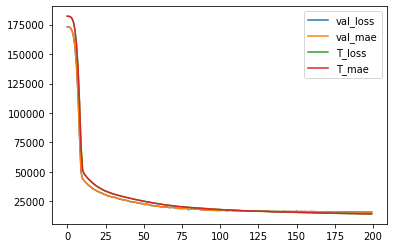

In [469]:
val_loss=hist.history["val_loss"]
val_mse=hist.history["val_mae"]
loss=hist.history["loss"]
mse=hist.history["mae"]

plt.plot(val_loss,label="val_loss")
plt.plot(val_mse,label="val_mae")
plt.plot(loss,label="T_loss")
plt.plot(mse,label="T_mae")

plt.legend()
plt.show()

In [275]:
# ((model.predict(X_newT))*np.std(Y)+np.mean(Y))

In [470]:
model.predict(XT)

array([[205447.66 ],
       [193036.72 ],
       [214844.98 ],
       ...,
       [169022.39 ],
       [113729.695],
       [167112.44 ]], dtype=float32)

In [471]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1095    176432
1096    127000
1097    170000
1098    128000
1099    157000
Name: SalePrice, Length: 1100, dtype: int64

In [278]:
Y[1000]

82000

In [26]:
!pip install h5py

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [27]:
!python -m pip install --upgrade pip

  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3


In [28]:
!pip install h5py

model.save(".h5")

In [426]:
Xt=pd.read_csv("Test_Data.csv")

In [427]:
Xt.shape

(360, 80)

In [428]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 80 columns):
Id               360 non-null int64
MSSubClass       360 non-null int64
MSZoning         360 non-null object
LotFrontage      293 non-null float64
LotArea          360 non-null int64
Street           360 non-null object
Alley            22 non-null object
LotShape         360 non-null object
LandContour      360 non-null object
Utilities        360 non-null object
LotConfig        360 non-null object
LandSlope        360 non-null object
Neighborhood     360 non-null object
Condition1       360 non-null object
Condition2       360 non-null object
BldgType         360 non-null object
HouseStyle       360 non-null object
OverallQual      360 non-null int64
OverallCond      360 non-null int64
YearBuilt        360 non-null int64
YearRemodAdd     360 non-null int64
RoofStyle        360 non-null object
RoofMatl         360 non-null object
Exterior1st      360 non-null object
Exterior2nd   

In [429]:
col_to_drop

['Alley',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'FireplaceQu',
 'Id',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [430]:
Xt=Xt.drop(columns=col_to_drop,axis=1)

In [431]:
Xt.shape

(360, 66)

In [432]:
# Xt=Xt.drop(columns=["YearBuilt","YrSold"])

In [433]:
Xt.shape

(360, 66)

In [434]:
Xt

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition
0,30,RL,60.0,8400,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,246,TA,TA,N,0,0,0,0,WD,Normal
1,20,RL,61.0,9758,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,280,TA,TA,Y,0,0,0,0,WD,Normal
2,20,RL,70.0,7000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,254,TA,TA,Y,0,16,0,0,WD,Family
3,20,RL,79.0,8910,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,539,TA,TA,Y,0,0,192,0,WD,Normal
4,160,RM,24.0,2016,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,440,TA,TA,Y,0,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,460,TA,TA,Y,0,40,0,0,WD,Normal
356,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,500,TA,TA,Y,349,0,0,0,WD,Normal
357,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,252,TA,TA,Y,0,60,0,0,WD,Normal
358,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,240,TA,TA,Y,366,0,112,0,WD,Normal


In [435]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 66 columns):
MSSubClass       360 non-null int64
MSZoning         360 non-null object
LotFrontage      293 non-null float64
LotArea          360 non-null int64
Street           360 non-null object
LotShape         360 non-null object
LandContour      360 non-null object
Utilities        360 non-null object
LotConfig        360 non-null object
LandSlope        360 non-null object
Neighborhood     360 non-null object
Condition1       360 non-null object
Condition2       360 non-null object
BldgType         360 non-null object
HouseStyle       360 non-null object
OverallQual      360 non-null int64
OverallCond      360 non-null int64
YearBuilt        360 non-null int64
YearRemodAdd     360 non-null int64
RoofStyle        360 non-null object
RoofMatl         360 non-null object
Exterior1st      360 non-null object
Exterior2nd      360 non-null object
MasVnrType       358 non-null object
MasVnrArea  

In [436]:
Xt["BsmtQual"].fillna(Xt["BsmtQual"].value_counts().keys()[0],inplace=True)

In [437]:
Xt["MasVnrType"].fillna(Xt["MasVnrType"].value_counts().keys()[0],inplace=True)

In [438]:
Xt["BsmtCond"].fillna(Xt["BsmtCond"].value_counts().keys()[0],inplace=True)

In [439]:
Xt["BsmtExposure"].fillna(Xt["BsmtExposure"].value_counts().keys()[0],inplace=True)

In [440]:
Xt["BsmtFinType1"].fillna(Xt["BsmtFinType1"].value_counts().keys()[0],inplace=True)

In [441]:
Xt["BsmtFinType2"].fillna(Xt["BsmtFinType2"].value_counts().keys()[0],inplace=True)

In [442]:
Xt["GarageType"].fillna(Xt["GarageType"].value_counts().keys()[0],inplace=True)

In [443]:
Xt["GarageFinish"].fillna(Xt["GarageFinish"].value_counts().keys()[0],inplace=True)

In [444]:
Xt["GarageQual"].fillna(Xt["GarageQual"].value_counts().keys()[0],inplace=True)

In [445]:
Xt["GarageCond"].fillna(Xt["GarageCond"].value_counts().keys()[0],inplace=True)

In [446]:
Xt["Electrical"].fillna(Xt["Electrical"].value_counts().keys()[0],inplace=True)

In [447]:
Xt["LotFrontage"]=Xt["LotFrontage"].fillna(Xt["LotFrontage"].mean())

In [448]:
Xt["MasVnrArea"]=Xt["MasVnrArea"].fillna(Xt["MasVnrArea"].mean())

In [449]:
Xt["GarageYrBlt"]=Xt["GarageYrBlt"].fillna(Xt["GarageYrBlt"].mean())

In [450]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 66 columns):
MSSubClass       360 non-null int64
MSZoning         360 non-null object
LotFrontage      360 non-null float64
LotArea          360 non-null int64
Street           360 non-null object
LotShape         360 non-null object
LandContour      360 non-null object
Utilities        360 non-null object
LotConfig        360 non-null object
LandSlope        360 non-null object
Neighborhood     360 non-null object
Condition1       360 non-null object
Condition2       360 non-null object
BldgType         360 non-null object
HouseStyle       360 non-null object
OverallQual      360 non-null int64
OverallCond      360 non-null int64
YearBuilt        360 non-null int64
YearRemodAdd     360 non-null int64
RoofStyle        360 non-null object
RoofMatl         360 non-null object
Exterior1st      360 non-null object
Exterior2nd      360 non-null object
MasVnrType       360 non-null object
MasVnrArea  

In [451]:
Xt=pd.get_dummies(Xt,drop_first=True)

In [453]:
Xt.shape

(360, 196)

In [454]:
XT,Xt = XT.align(Xt, join='inner', axis=1) #Inner join

In [455]:
Xt.shape

(360, 187)

In [456]:
XT.shape

(1100, 187)

In [457]:
Xt.shape

(360, 187)

In [458]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 187 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(25), uint8(159)
memory usage: 134.8 KB


In [459]:
Xt=min_max_scalar.fit_transform(Xt)

In [472]:
Xt

array([[0.05882353, 0.13356164, 0.11012926, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.1369863 , 0.13190814, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.16780822, 0.08767681, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.15410959, 0.12042531, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.1609589 , 0.1312506 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.18493151, 0.13477884, ..., 0.        , 1.        ,
        0.        ]])

In [473]:
pred=model.predict(Xt)

In [474]:
pred

array([[ 48751.477],
       [101553.4  ],
       [113275.49 ],
       [179893.52 ],
       [109947.43 ],
       [300900.   ],
       [188026.2  ],
       [273465.3  ],
       [163695.98 ],
       [296193.53 ],
       [186313.22 ],
       [195935.69 ],
       [ 99819.94 ],
       [123467.64 ],
       [114599.734],
       [317209.1  ],
       [202285.3  ],
       [108934.02 ],
       [132299.47 ],
       [138040.38 ],
       [133380.72 ],
       [222246.1  ],
       [ 67557.17 ],
       [102380.96 ],
       [152317.11 ],
       [112726.66 ],
       [177622.48 ],
       [231402.58 ],
       [210698.17 ],
       [133437.28 ],
       [164589.89 ],
       [101848.53 ],
       [148115.34 ],
       [206680.06 ],
       [167953.8  ],
       [ 95847.71 ],
       [107620.89 ],
       [ 89285.62 ],
       [192718.84 ],
       [130765.72 ],
       [109393.31 ],
       [209199.14 ],
       [359933.47 ],
       [ 93253.98 ],
       [ 67894.59 ],
       [120618.414],
       [158402.48 ],
       [16111

In [475]:
id_matrix=np.array([int(x) for x in range(1101,1101+360)])

In [476]:
id_matrix.shape

(360,)

In [477]:
id_matrix=id_matrix.reshape((360,1))

In [478]:
id_matrix.shape

(360, 1)

In [479]:
final_pred=np.hstack((id_matrix,pred))

In [480]:
df=pd.DataFrame(final_pred,columns=["Id","SalePrice"])

In [481]:
df

,Id,SalePrice
0,1101.0,48751.476562
1,1102.0,101553.398438
2,1103.0,113275.492188
3,1104.0,179893.515625
4,1105.0,109947.429688
...,...,...
355,1456.0,166831.906250
356,1457.0,197124.890625
357,1458.0,253625.875000
358,1459.0,146843.812500


In [482]:
df=df.astype(int)

In [483]:
df

,Id,SalePrice
0,1101,48751
1,1102,101553
2,1103,113275
3,1104,179893
4,1105,109947
...,...,...
355,1456,166831
356,1457,197124
357,1458,253625
358,1459,146843


In [484]:
df.to_csv("pred.csv",index=False)